In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
import numpy as np
%matplotlib inline
import pygmo as pg
from pygmo import algorithm
import os
import sys
import json
from orbsim.r3b_2d import UNIT_TIME
from orbsim.r3b_2d.analyticals import *
from orbsim.r3b_2d.simulators import launch_sim
from orbsim.plotting import orbitplot2d, orbitplot_non_inertial
import time
from random import shuffle
from numba import jit
import math
from math import pi

pi8=pi/8
pi4=pi/4
pi2=pi/2

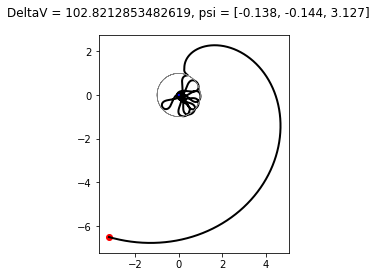

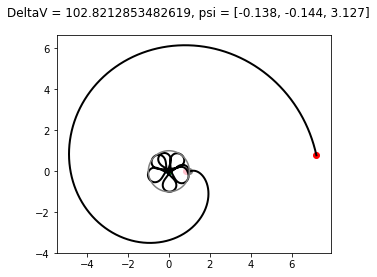

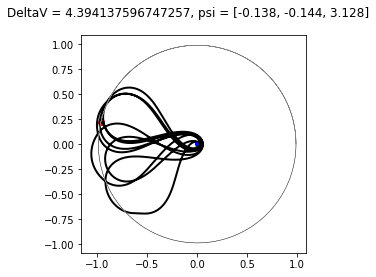

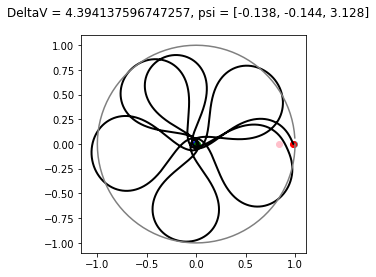

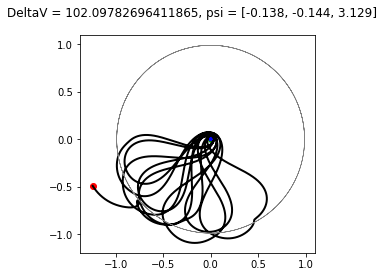

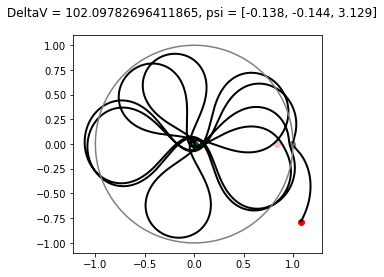

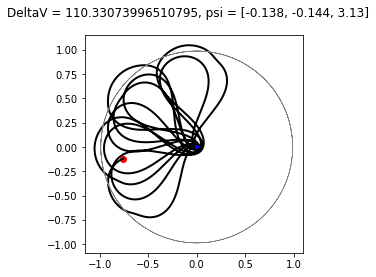

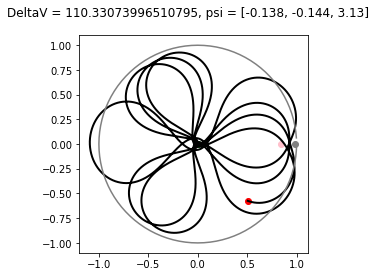

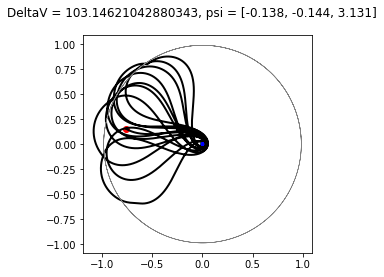

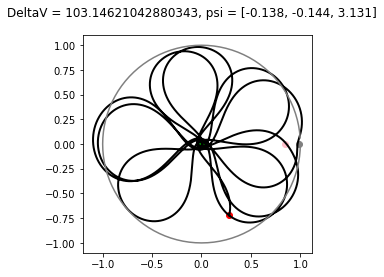

In [2]:
psis=[]
paths=[]
N=5
for i in range(N):
    psi = [-0.138042744751570, -0.144259374836607, 3.127288444444444+i/1e3]
    path = launch_sim(psi,max_iter=1e7, duration=100/UNIT_TIME)
    orbitplot2d(path,psi)
    orbitplot_non_inertial(path,psi)
    psis.append(psi)
    paths.append(path)


In [37]:
lyaps=[]
for a in range(N):
    for b in range(N):
        if a==b:
            continue
        lyap=[]
        _a=np.array(paths[a][1]).T
        _b=np.array(paths[b][1]).T
        xas=_a[0]
        yas=_a[1]
        xbs=_b[0]
        ybs=_b[1]
        hs=(_a[4],_b[4])        
        
        ts=[None,None]
        for l in range(len(hs)):
            idxs=[]
            tally=0
            for i in range(len(hs[l])):
                h=hs[l][i]
                tally+=h
                if tally>=1.5e-6:
                    idxs.append(i)
                    tally=0
            ts[l]=idxs
            
        min_ts=min(ts,key=len)
        for i in range(len(min_ts)):
            idx=min_ts[i]
            lyap.append(sqrt((xas[idx]-xbs[idx])**2+(yas[idx]-ybs[idx])**2))
        lyaps.append(lyap)
print(len(lyaps))

20


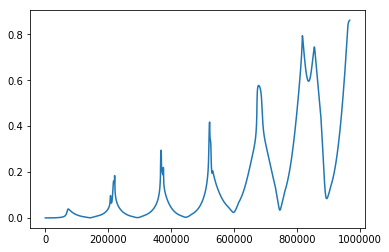

In [44]:
plt.plot(range(len(lyaps[5])),lyaps[5])

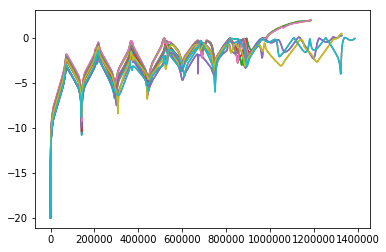

In [35]:
for i in range(len(lyaps)):
    lyap=lyaps[i][1:]
    loglyap=[np.log(x) for x in lyap]
    plt.plot(range(len(loglyap)),loglyap)

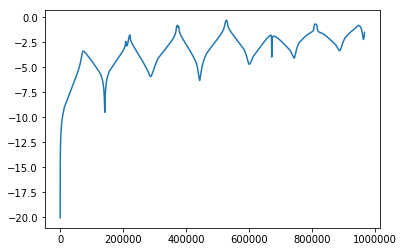

In [36]:
    lyap=lyaps[0][1:]
    loglyap=[np.log(x) for x in lyap]
    plt.plot(range(len(loglyap)),loglyap)

In [10]:
derp = np.array(paths[0][1]).T
hderp=derp[4]
hderp

array([1.00000000e-06, 4.41545159e-08, 4.41540016e-08, ...,
       3.58244599e-05, 3.58244629e-05, 3.58244648e-05])

In [11]:
csum=np.cumsum(hderp)
csum

array([1.00000000e-06, 1.04415452e-06, 1.08830852e-06, ...,
       2.29980477e+01, 2.29980835e+01, 2.29981193e+01])

In [29]:
idxs=[]
tally=0
for i in range(len(hderp)):
    h=hderp[i]
    tally+=h
    if tally>=1.5e-6:
        idxs.append(i)
        tally=0
len(idxs)

1185623

In [13]:
len(csum)

1619475

In [17]:
np.mean(hderp)

1.4200972119633385e-05

In [30]:
idxs

[12,
 46,
 80,
 115,
 150,
 185,
 220,
 255,
 290,
 325,
 360,
 395,
 430,
 465,
 500,
 535,
 570,
 605,
 640,
 675,
 710,
 745,
 780,
 815,
 850,
 885,
 920,
 955,
 990,
 1025,
 1060,
 1095,
 1130,
 1165,
 1200,
 1235,
 1270,
 1305,
 1340,
 1375,
 1410,
 1445,
 1480,
 1515,
 1550,
 1585,
 1620,
 1655,
 1690,
 1725,
 1760,
 1795,
 1830,
 1865,
 1900,
 1935,
 1970,
 2005,
 2040,
 2075,
 2110,
 2145,
 2180,
 2215,
 2250,
 2285,
 2320,
 2355,
 2390,
 2425,
 2460,
 2495,
 2530,
 2565,
 2600,
 2635,
 2670,
 2705,
 2740,
 2775,
 2810,
 2845,
 2880,
 2915,
 2950,
 2985,
 3020,
 3055,
 3090,
 3125,
 3160,
 3195,
 3230,
 3265,
 3300,
 3335,
 3370,
 3405,
 3440,
 3475,
 3510,
 3545,
 3580,
 3615,
 3650,
 3685,
 3720,
 3755,
 3790,
 3825,
 3860,
 3895,
 3930,
 3965,
 4000,
 4035,
 4070,
 4105,
 4140,
 4175,
 4210,
 4245,
 4280,
 4315,
 4350,
 4385,
 4420,
 4455,
 4490,
 4525,
 4560,
 4595,
 4630,
 4665,
 4700,
 4735,
 4770,
 4805,
 4840,
 4875,
 4910,
 4945,
 4980,
 5015,
 5050,
 5085,
 5120,
 51